### Imports

In [ ]:
import dash
from dash import dcc
from dash import html
import plotly.express as px
import pandas as pd

### Read data

In [ ]:
# Read in the data
data = pd.read_csv("precious_metals_prices_2018_2021.csv", usecols=["DateTime", "Gold"])

### Create Figure

In [ ]:
# Create a plotly plot for use by dcc.Graph(). Notice list for y= to make color_discrete_map work
fig = px.line(
    data,
    title="Precious Metal Prices 2018-2021",
    x="DateTime",
    y=["Gold"],
    color_discrete_map={"Gold": "gold"}
)

### Update Layout

In [ ]:
fig.update_layout(
    template="plotly_dark",
    xaxis_title="Date",
    yaxis_title="Price (USD/oz)",
    font=dict(
        family="Verdana, sans-serif",
        size=18,
        color="white"
    ),
)

### Define App Layout

In [ ]:
app = dash.Dash(__name__)
app.title = "Precious Metal Prices 2018-2021"


# We add an area which contains Dropdown
app.layout = html.Div(
    id="app-container",
    children=[
        html.Div(
            id="header-area",
            children=[
                html.H1(
                    id="header-title",
                    children="Precious Metal Prices",

                ),
                html.P(
                    id="header-description",
                    children=("The cost of precious metals", html.Br(), "between 2018 and 2021"),
                ),
            ],
        ),
        html.Div(
            id="menu-area",
            children=[
                html.Div(
                    children=[
                        html.Div(
                            className="menu-title",
                            children='Metal'
                        ),
                        dcc.Dropdown(
                            id='metal-filter',
                            className="dropdown",
                            options=[{"label":metal, "value":metal} for metal in data.columns[1:]],
                            clearable=False
                        )
                    ]
                )

            ]
        ),
        html.Div(
            id="graph-container",
            children=dcc.Graph(
                id="price-chart",
                figure=fig,
                config={"displayModeBar": False}
            ),
        ),
    ]
)

### Run the app

In [ ]:
if __name__ == "__main__":
    app.run_server(debug=True)

This is how the output looks like - 

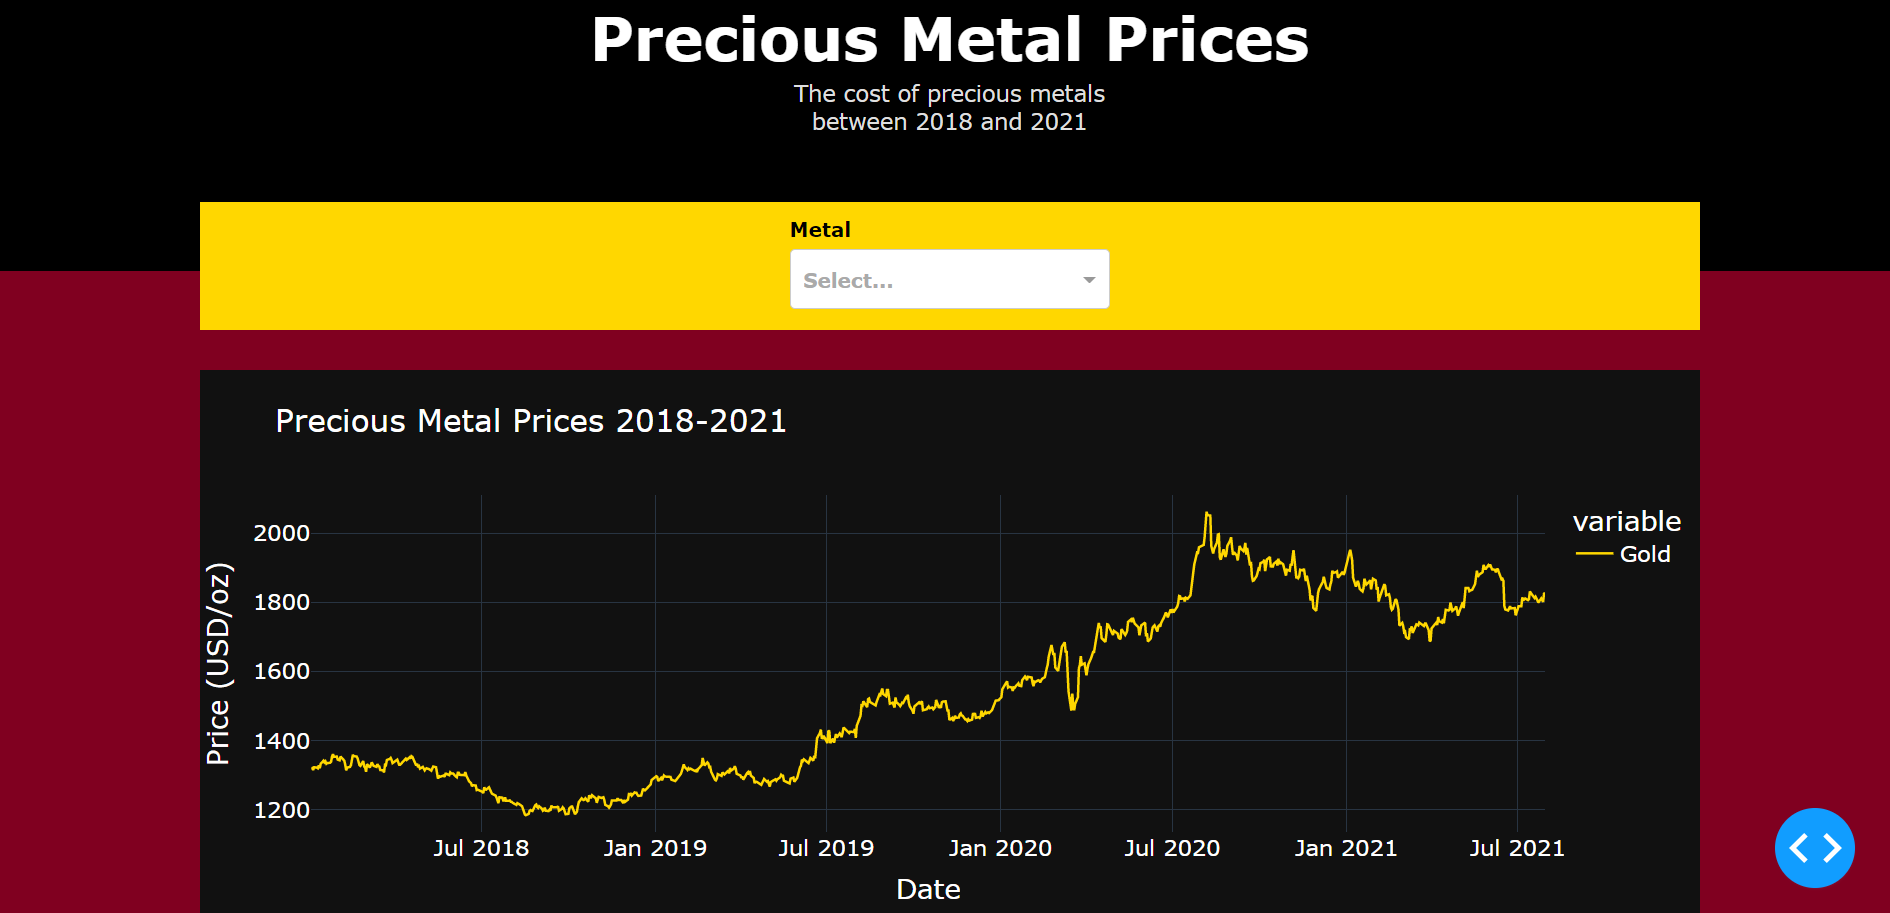